# Minimum Spanning Tree
### Kruskal and Prim algorithm
This program runs the Kruskal  and Prim algorithm using the networkx external library built to create Graph objects, here we do not use the graph class, instead understanding how to create the graph by a function

In [1]:
import sys
!{sys.executable} -m pip install networkx  #Install networkx directly for this notebook

import networkx as nx                 #importing networkx library
from networkx.algorithms import tree  #library to create a tree

import matplotlib.pyplot as plt       #pyplot to draw the created graph
limits = plt.axis('off')              #if were to be deleted, graph will show in an axis

Invalid requirement: '#Install'



### Initializing Vertices and Edges

In [2]:
V=[1,2,3,4,5,6,7]

E=[{ 'sisi': [1,2], 'bobot':10},
    { 'sisi': [1,5], 'bobot':15},
    { 'sisi': [2,3], 'bobot':20},
    { 'sisi': [3,5], 'bobot':30},
    { 'sisi': [4,5], 'bobot':25},
    { 'sisi': [3,6], 'bobot':40},
    { 'sisi': [6,7], 'bobot':50}]

['a', 'c', 'd']


D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


TypeError: '<' not supported between instances of 'str' and 'int'

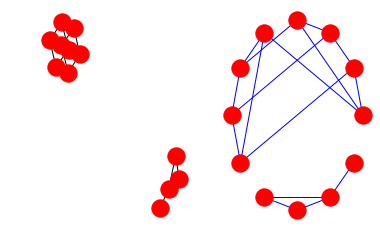

In [3]:
#Just testing out some things, like drawing the Dijkstra path right here!

G1 = nx.Graph()
G1 = nx.cubical_graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G1.add_weighted_edges_from(e)
print(nx.dijkstra_path(G1, 'a', 'd')) 


plt.subplot(121)
nx.draw(G1) # default spring_layout
plt.subplot(122)
nx.draw(G1, pos=nx.circular_layout(G1), node_color='r', edge_color='b')

T = nx.minimum_spanning_tree(G1)
sorted(T.edges(data=True))

### The Graph
The initial graph looks like this, but this ain't a tree you see, because it has a cycle in it

In [4]:
G = nx.cycle_graph(1, create_using = nx.Graph())
G.add_edge(1, 2, weight = 10)
G.add_edge(1, 5, weight = 15)
G.add_edge(2, 3, weight = 20)
G.add_edge(3, 5, weight = 30)
G.add_edge(4, 5, weight = 25)
G.add_edge(3, 6, weight = 40)
G.add_edge(6, 7, weight = 50)

sorted(G.edges(data=True))

[(0, 0, {}),
 (1, 2, {'weight': 10}),
 (1, 5, {'weight': 15}),
 (2, 3, {'weight': 20}),
 (3, 6, {'weight': 40}),
 (5, 3, {'weight': 30}),
 (5, 4, {'weight': 25}),
 (6, 7, {'weight': 50})]

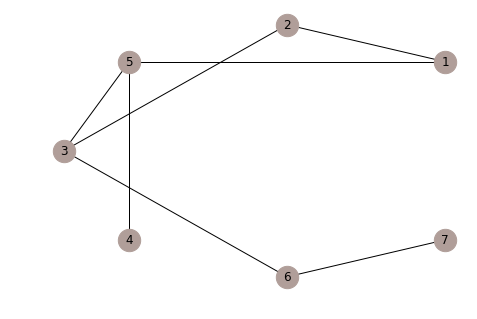

In [5]:
nx.draw_circular(G, edge_labels='weight', with_labels=True, nodelist=[1,2,3,4,5,6,7], node_size=500 ,node_color='#b09e99')

## Kruskal Algorithm

Kruskal's algorithm is a minimum-spanning-tree algorithm which finds an edge of the least possible weight that connects any two trees in the forest.[1] It is a greedy algorithm in graph theory as it finds a minimum spanning tree for a connected weighted graph adding increasing cost arcs at each step. Source: wiki (duh) 

#1. Sort all the edges in non-decreasing order of their weight.
#2. Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far. If cycle is not formed, include this edge. Else, discard it.
#3. Repeat step #2 until there are (V-1) edges in the spanning tree.

In [6]:
def kruskal(V,E):
    G = nx.cycle_graph(1, create_using = nx.Graph())
    for i in range(len(V)):
        #Just like adding edges in the G graph above, but looping the values of E
        G.add_edge(E[i]['sisi'][0], E[i]['sisi'][1], weight = E[i]['bobot'])
    
    TKruskal = nx.minimum_spanning_tree(G, weight = 'weight', algorithm = 'kruskal', ignore_nan = False)
    
    
    nx.draw_circular(TKruskal, edge_labels='weight', with_labels=True, nodelist=[1,2,3,4,5,6,7], node_size=500 ,node_color='#64b6ac')
    return sorted(TKruskal.edges(data=True))

[(1, 2, {'weight': 10}),
 (1, 5, {'weight': 15}),
 (2, 3, {'weight': 20}),
 (3, 6, {'weight': 40}),
 (5, 4, {'weight': 25}),
 (6, 7, {'weight': 50})]

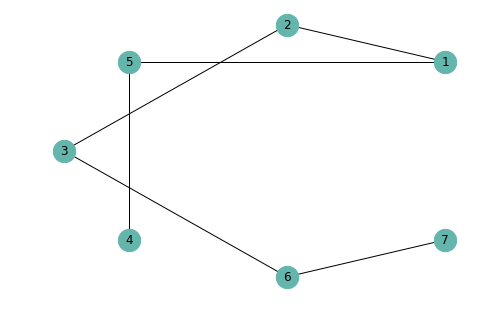

In [7]:
kruskal(V,E)

## Prim's Algorithm
is a greedy algorithm that finds a minimum spanning tree for a weighted undirected graph. This means it finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized. The algorithm operates by building this tree one vertex at a time, from an arbitrary starting vertex, at each step adding the cheapest possible connection from the tree to another vertex. Source: more wiki.

#1. Initialize a tree with a single vertex, chosen arbitrarily from the graph.
#2. Grow the tree by one edge: of the edges that connect the tree to vertices not yet in the tree, find the minimum-weight edge, and transfer it to the tree.
#3. Repeat step 2 (until all vertices are in the tree)

In [8]:
def prim(V,E):
    G = nx.cycle_graph(1, create_using = nx.Graph())
    for i in range(len(V)):
        G.add_edge(E[i]['sisi'][0], E[i]['sisi'][1], weight = E[i]['bobot'])
    
    TPrim = nx.minimum_spanning_tree(G, weight = 'weight', algorithm = 'prim', ignore_nan = False)
    nx.draw_circular(TPrim, edge_labels='weight', with_labels=True, nodelist=[1,2,3,4,5,6,7], node_size=500 ,node_color='#fad4c0')
    return sorted(TPrim.edges(data=True))

[(1, 2, {'weight': 10}),
 (1, 5, {'weight': 15}),
 (2, 3, {'weight': 20}),
 (3, 6, {'weight': 40}),
 (5, 4, {'weight': 25}),
 (6, 7, {'weight': 50})]

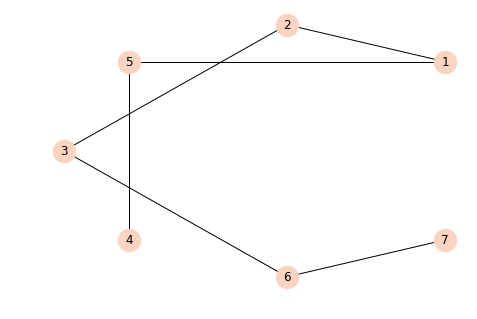

In [9]:
prim(V,E)